## 1. 데이터 병합

#### '연구문제2-1.txt' 와 '연구문제2-3.txt' 데이터 합치기


In [57]:
with open('연구문제2-2(영종).txt', 'r', encoding='utf-8') as file1, open('연구문제2-2(송도).txt', 'r', encoding='utf-8') as file2:
    data1 = file1.read()
    data2 = file2.read()

combined_data = data1 + '\n' + data2

with open('all_연구문제2-2(수정전).txt', 'w', encoding='utf-8') as file:
    file.write(combined_data)

In [58]:
# TEANAPS 라이브러리를 불러옵니다.
from teanaps.nlp import MorphologicalAnalyzer
from teanaps.nlp import Processing
from teanaps.handler import FileHandler

ma = MorphologicalAnalyzer()
pro = Processing()
fh = FileHandler()
ma.set_tagger("okt") # MECAB 형태소 분석기 사용 

# 2. 텍스트 전처리

#### 단어 빈도 확인

In [59]:
PATH = "all_연구문제2-2.txt"
f = open(PATH, encoding="utf-8")
line = f.readline()
col = line.split("\t")
print("Number of columns: ", len(col))
f.close()

Number of columns:  6


In [117]:
# 키워드 빈도 확인

line_count = 0
sample_dict = {}

tokenized_sentence_list = []
PATH = "all_연구문제2-2.txt"
POS_LIST = ["NNG", "NNP","VA"]

f = open(PATH, encoding="utf-8")
tokenized_sentence_list = []


for line in f:
    line_count += 1
    print(line_count, end = '\r')
    line = line.strip()
    col = line.split('\t')
    word_list = ma.parse(line)
    for word, pos, loc in word_list:
        if word != "" and pos in ["NNG", "NNP","VA"]:
            if word in sample_dict.keys():
                sample_dict[word] += 1
            else:
                sample_dict[word] = 1

f.close()

sample_list = []

for word, count in sample_dict.items():
    sample_list.append([word, count])

sample_list.sort(key=lambda elem: elem[1], reverse=True)

for word, count in sample_list[:50]:
    print(word + "\t" + str(count))

맘	2215
자유게시판	1974
수다	1247
버스	848
힐링	783
다방	763
아이모드	523
이용	383
저	367
아이	331
영파	313
시간	272
때	251
이야기	202
택시	188
같아요	182
하늘	175
노선	174
요	174
운행	167
더	165
타고	161
민원	156
배차	153
도시	151
인천	150
것	148
번	145
글	142
호출	137
영종	132
사람	129
궁금한	125
분	121
입니다	119
생각	119
차	117
영종도	117
그	117
전	109
수	107
송도	104
기사	98
정말	97
진짜	96
거	96
시	96
좀	96
한번	91
안	89


In [63]:
# line 개수
line_count

2277

In [118]:

PATH = "all_연구문제2-2.txt"
POS_LIST = ["NNG", "NNP","VA"]  # 일반명사, 고유명사, 형용사

count_all=[]
document_list=[]
tokenized_sentence_list = []

f = open(PATH, encoding="utf-8")

# 파일에서 기사본문만 추출하여 명사형 문장을 생성합니다.
for line in f:
    line = line.strip()
    col = line.split("\t") # [label, souce, datetime, title, content]
    
     # 컬럼 수가 6개 미만이면, 해당 줄을 무시합니다.
    if len(col)<6 :
        continue
        
    #post = col[0]
    #writer = col[1]         # 작성자
    #datetime = col[2]        # 작성일자
    #category = col[3]      # 게시판 종류
    #title = col[4]         # 게시물 제목
    content = col[5] # 본문

    tagged_word_list = ma.parse(content)
    count_all.append(tagged_word_list)
    #sa_result = sa.parse(tagged_word_list, [])
    tokenized_sentence = pro.get_plain_text(tagged_word_list, pos_list=POS_LIST, tag=False) # 품사제안을 
    tokenized_sentence_list.append(tokenized_sentence)
    document_list.append(content)
   


f.close()

tokenized_sentence_list[:10]

['어제 설문조사 전화 혹시 역시네요 버스 배차 안좋고 버스 빙빙 아이모드 이용 왜 백퍼 단비 같았는데 버스 노선 낫다 분 계시 거의 없고 아파트 더 더 빙빙',
 '택시 차 없는 뚜벅 웁니',
 '버스 좋았는데 오히려 증차 더 사용 아쉬워요 정말',
 '임신 아기 데리 정말 뚜벅 웁니',
 '좋은 건 기분',
 '',
 '용했는데 아쉬워요',
 '오늘 마지막 타고 눈물 기사 실직 우리 아이모드 버스',
 '뭐 버스 증차 고하 데 아이모드 그대로 유지 버스 증 아닌가요 아이모드 기사 친절하시고 편하고 좋았는데 아쉽습니다 기사 실직 맘 안좋구요',
 '저 이사 좋은 거 어플 하니 아쉬워요']

In [65]:
# 전체 토큰개수 확인
all_count = 0
for i in range(0, len(count_all)):
    all_count += len(count_all[i])
print(all_count)

60985


In [66]:
# 명사, 형용사 토큰개수 확인
noun_count = 0
for i in range(0, len(tokenized_sentence_list)):
    noun_count += len(tokenized_sentence_list[i].split(' '))
print(noun_count)

29698


In [67]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

In [79]:
# TF/TF-IDF 값을 계산합니다.
tfidf.calculation_tfidf(tokenized_sentence_list, tfidf_count=100, tfidf_state=True)

In [80]:
# 단어 x TF 매트릭스를 생성합니다.
tfidf.get_tf_matrix()

//api.i-mod.kr:10443/common/modintro  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
2232                                     0   
2233                                     0   
2234                                     0   
2235                                     0   
2236                                     0   

      //cafe.naver.com/yeongjongdolove/570488  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
2232                                        0   
2233                                        0   
2234                                        0   
2235                                        0   
2236                                        0   

      //itunes.apple.com/app/id1549626399  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
2232                                    0   
2233                                    0   
2234                                    0   
2235                                    0   
2236                                    0   

      //m.korea.kr/news/pressreleaseview.do  //m.munhwa.com/mnews/view.html  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
2232                                      0                               0   
2233                                      0                               0   
2234                                      0                               0   
2235                                      0                               0   
2236                                      0                               0   

      //n.news.naver.com/article/001/0012922284  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
2232                                          0   
2233                                          0   
2234                                          0   
2235                                          0   
2236                                          0   

      //play.google.com/store/apps/details  @  [  ]  http  i-mod  \
0                                        0  0  0  0     0      0   
1                                        0  0  0  0     0      0   
2                                        0  0  0  0     0      0   
3                                        0  0  0  0     0      0   
4                                        0  0  0  0     0      0   
...                                    ... .. .. ..   ...    ...   
2232                                     0  0  0  0     0      0   
2233                                     0  0  0  0     0      0   
2234                                     0  0  0  0     0      0   
2235                                     0  0  0  0     0      0   
2236         

In [81]:
# 단어 x TF-IDF 매트릭스를 생성합니다.
tfidf.get_tfidf_matrix()

//api.i-mod.kr:10443/common/modintro  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
2232                                   0.0   
2233                                   0.0   
2234                                   0.0   
2235                                   0.0   
2236                                   0.0   

      //cafe.naver.com/yeongjongdolove/570488  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
2232                                      0.0   
2233                                      0.0   
2234                                      0.0   
2235                                      0.0   
2236                                      0.0   

      //itunes.apple.com/app/id1549626399  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
2232                                  0.0   
2233                                  0.0   
2234                                  0.0   
2235                                  0.0   
2236                                  0.0   

      //m.korea.kr/news/pressreleaseview.do  //m.munhwa.com/mnews/view.html  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   
...                                     ...                             ...   
2232                                    0.0                             0.0   
2233                                    0.0                             0.0   
2234                                    0.0                             0.0   
2235                                    0.0                             0.0   
2236                                    0.0                             0.0   

      //n.news.naver.com/article/001/0012922284  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
2232                                        0.0   
2233                                        0.0   
2234                                        0.0   
2235                                        0.0   
2236                                        0.0   

      //play.google.com/store/apps/details    @    [    ]  http  i-mod  \
0                                      0.0  0.0  0.0  0.0   0.0    0.0   
1                                      0.0  0.0  0.0  0.0   0.0    0.0   
2                                      0.0  0.0  0.0  0.0   0.0    0.0   
3                                      0.0  0.0  0.0  0.0   0.0    0.0   
4                                      0.0  0.0  0.0  0.0   0.0    0.0   
...                                    ...  ...  ...  ...   ...    ...   
2232                                   0.0  0.0  0.0  0.0   0.0    0.0   
2233                                   0.0  0.0  0.0  0.0   0.0    0.0   
2234                                   0.0  0.0  0.0  0.0   0.0    0.0   
2235                 

In [82]:
# TF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tf_dict()

{'어제': 24,
 '설문조사': 4,
 '전화': 18,
 '혹시': 47,
 '역시네요': 1,
 '배차': 150,
 '안좋고': 1,
 '빙빙': 9,
 '왜': 45,
 '백퍼': 1,
 '단비': 1,
 '같았는데': 1,
 '노선': 167,
 '낫다': 2,
 '계시': 6,
 '거의': 28,
 '없고': 19,
 '아파트': 37,
 '더': 157,
 '택시': 180,
 '없는': 27,
 '뚜벅': 35,
 '웁니': 2,
 '좋았는데': 9,
 '오히려': 14,
 '증차': 21,
 '아쉬워요': 12,
 '정말': 96,
 '임신': 2,
 '아기': 44,
 '데리': 18,
 '좋은': 65,
 '건': 21,
 '기분': 11,
 '': 58,
 '용했는데': 4,
 '오늘': 58,
 '마지막': 5,
 '눈물': 1,
 '기사': 96,
 '실직': 5,
 '고하': 1,
 '데': 26,
 '그대로': 5,
 '유지': 23,
 '증': 19,
 '아닌가요': 6,
 '친절하시고': 10,
 '편하고': 18,
 '아쉽습니다': 6,
 '안좋구요': 1,
 '이사': 12,
 '어플': 63,
 '하니': 12,
 '편했는데': 3,
 '자리': 14,
 '출발': 28,
 '친절했는데': 1,
 '서운하네요': 1,
 '내일': 14,
 '운행': 161,
 '슬프네요': 3,
 '가요': 52,
 '마음': 45,
 '안좋네요': 1,
 '친절하셨는데': 1,
 '영종도': 103,
 '로만': 10,
 '운영': 52,
 '없는데': 11,
 '아침': 31,
 '출근시간': 17,
 '하늘': 117,
 '도시': 140,
 '물류': 7,
 '단지': 26,
 '라인': 3,
 '있어서': 26,
 '있었는데': 11,
 '아쉽네요': 29,
 '계약': 2,
 '종료': 18,
 '경기도': 6,
 '대로': 22,
 '같은': 44,
 '검단': 27,
 '여대': 3,
 '지원': 25,
 '금은': 1,

In [83]:
# TF-IDF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tfidf_dict()

{'시간': 35.38240325606256,
 '택시': 35.280691352278275,
 '노선': 20.802068353633658,
 '운행': 26.730035884780126,
 '더': 23.607528108670184,
 '배차': 23.649010764743043,
 '도시': 17.900799366423445,
 '호출': 23.721370964276957,
 '하늘': 17.66043889253834,
 '영종도': 14.605714697443231,
 '영종': 13.420230095503365,
 '정말': 22.030941329349535,
 '기사': 16.339189434932663,
 '송도': 17.02953611981391,
 '한번': 19.76738395416192,
 '말': 12.288747606040744,
 '학원': 14.540394182072934,
 '대중교통': 11.790080066181769,
 '도착': 12.032755093521201,
 '지금': 11.85516479301115,
 '바로': 13.502040997583626,
 '다시': 17.410601339223025,
 '영종역': 11.658401779277789,
 '요금': 14.630933326886595,
 '차량': 11.883702108412912,
 '앱': 13.694824420708857,
 '좋은': 16.07550638250253,
 '어플': 13.752326240945392,
 '정류장': 12.784639938193926,
 '서비스': 5.761071296315616,
 '그냥': 14.161608341483797,
 '자신': 5.808475529745603,
 '교통': 9.031186010985582,
 '오늘': 12.418128043145295,
 '또': 10.475356849445557,
 '신도시': 8.909626604823176,
 '걱정': 10.166651390433127,
 '보고': 1

In [84]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(50)

KeyError: ''

#### TF-IDF 기준 워드클라우드 

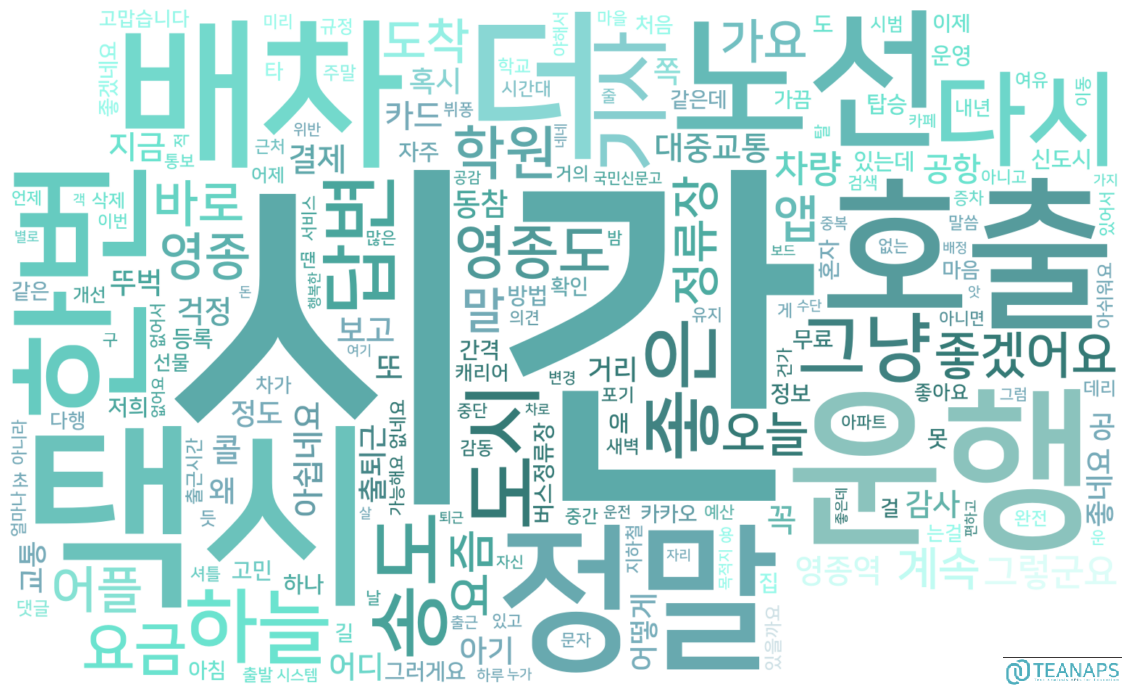

In [85]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

#### TF 기준 워드클라우드

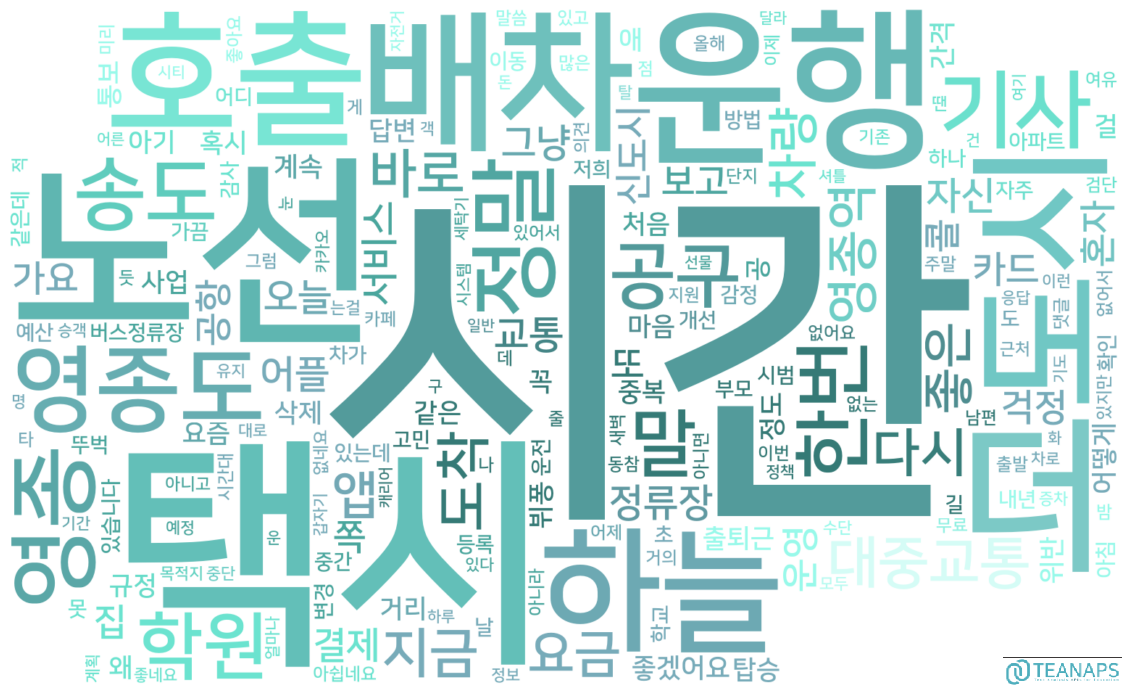

In [75]:
# TF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tf_dict()
tfidf.get_wordcloud(count_dict)

#### 불용어 처리

In [36]:
# 전체 불용어 리스트를 불러옵니다.
# TEANAPS 전처리기를 불러옵니다.
from teanaps.nlp import Processing

pro = Processing()

result = pro.get_stopword()
print(result[:10])

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함']


In [116]:
# 불용어를 리스트 단위로 추가합니다.
pro.add_stopword(["공", "타", "햇", "듯", "넵", "돌", "만", "시댁", "남편", "애", "말", "보지", "초", "낮", "외", "젠","늘", "고해", "포기", "커리", "기본", "라면", "둘째", "안될까"])

print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '민원', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '문제점', '문제', '린지', '중인', '를', '종국', '관련', '씨엘', '린지해당', '스마트', '버스']


#### 합성어, 동의어 처리

In [23]:
pro.add_cnoun("영종하늘도시")
result=pro.get_cnoun()
print(result)

['텍스트마이닝', '텍스트분석', '자연어처리', '지능정보학회', '비정형데이터', '악성댓글', '걸그룹', '쇼케이스', '허위유포', '흔들의자', '영종하늘도시']


In [3]:
pro.add_synonym({'영종하늘도시': ['영종하늘도시', '영종', '하늘','도시']})
result=pro.get_synonym()
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '시민': ['시민', '주민', '사람'], '현재': ['현재', '현황'], '인천광역시': ['인천광역시', '인천시', '인천'], '현황': ['현황', '상태', '실정'], '아이모드': ['아이모드', '아이', '모드'], '영종하늘도시': ['영종하늘도시', '영종', '하늘', '도시'], '대중교통': ['대중교통', '교통'], '검단신도시': ['검단신도시', '검단', '신도시']}


# 3.K-평균 군집화 (k-means Clustering)

#### 군집화 수행하기

In [65]:
from teanaps.text_analysis import DocumentClustering

dc = DocumentClustering()

In [81]:
# 군집의 개수 (K정하기, 최대 점을 몇번 이동할지 정하기)
NUM_CLUSTERS = 10 # K 정하기 # 피드백 10개 이상도 괜찮으니, 클러스터 갯수 늘려보자
MAX_ITERATIONS = 300 # 최대 점을 몇 번 이동할지 

result = dc.clustering("kmeans", tokenized_sentence_list, num_clusters=NUM_CLUSTERS, max_iterations=MAX_ITERATIONS)
#result = dc.clustering("dbscan", tokenized_sentence_list, eps=1.2, min_samples=5)
result
#리스트 안의 숫자가 클러스터 번호!! 아래의 결과는 3개의 클러스터가 있다. 

{'inertia': 1322.8071329624431,
 'predict_list': array([4, 3, 4, ..., 2, 2, 3], dtype=int32)}

#### 군집화 결과를 시각화하여 확인하기

In [82]:
import pandas as pd

#df_article = pd.DataFrame(document_list, columns = ["post", "writer", "datetime", "category", "title","content"])
df_article = pd.DataFrame(document_list, columns = ["content"])

PREDICT_LIST = result["predict_list"]
DF_DOCUMENT_LIST = df_article

df_result = dc.get_tfidf_tsne(tokenized_sentence_list, PREDICT_LIST, DF_DOCUMENT_LIST)
df_result

content  predict  \
0     서울까지갈수잇는.버스라던지.... 부천이던... 부평이던....  가는버스좀 생겻으...        4   
1     부천,부평살때는 88이 최고였는데요.. 88초마다 하나씩 온다는 88번버스..ㅋㅋ ...        3   
2                          맞아요..88.... 새벽때도 많이타고다녓는데...        4   
3                               막차가 새벽2시 첫차가 새벽4시라는..ㅋㅋ        3   
4                                 88번버스 그립네요.. 놓쳐도 금방왔죠        4   
...                                                 ...      ...   
2373             엄청 잘 써요 7년째 삼성꺼 잔 고장 없이 유용하게 잘 쓰고 있습니다        2   
2374                                삼성거는 넣을자리가없네여ㅠㅠ아휴ㅠㅠ        2   
2375  저는 아기사랑 너무나 잘썼어요 첫째때 사서 잘쓰고 보통 때 소량빨래돌리기 좋고 지금...        2   
2376                            ㅠㅠ감사해요ㅠ 자리만잇으면 삼성거넣구파여ㅠ        2   
2377                              저도 예비맘이라 아직도 고민중이네용..        3   

                                             plain text         x         y  
0     서울 까지 갈 수 잇 는 . 버스 라던지 . ... 부천 이 던 . .. 부평 이 ...  2.809117  0.871332  
1     부천 , 부평 살 때 는 88 이 최고 였 는데요 . . 88 초 마다 하나 씩 온...  2.044504 -0.711413  
2            맞 아요 . . 88 . ... 새벽 때 도 많이 타 고 다 녓는데 . ..  2.500326  0.588710  
3                     막차 가 새벽 2 시 첫차 가 새벽 4 시 라는 . . ㅋㅋ  1.682184 -3.863537  
4                          88 번 버스 그립 네요 . . 놓쳐도 금방 왔 죠  1.968862 -0.337417  
...                                                 ...       ...       ...  
2373      엄청 잘 써요 7 년 째 삼성 꺼 잔 고장 없이 유용 하 게 잘 쓰 고 있 습니다  0.402192 -4.353747  
2374                        삼성 거 는 넣 을 자리 가 없 네여 ㅠㅠ아휴ㅠㅠ  0.319232 -5.049829  
2375  저 는 아기 사랑 너무나 잘 썼 어요 첫째 때 사 서 잘 쓰 고 보통 때 소량 빨래...  0.780838 -1.610569  
2376                    ㅠㅠ감사해요ㅠ 자리 만 잇 으면 삼성 거 넣 구 파여 ㅠ  0.337037 -4.945133  
2377                   저 도 예비 맘 이 라 아직 도 고민 중 이 네 용 . .  1.674896 -0.513186  

[2378 rows x 5 columns]

In [83]:
#위 테이블의 x,y를 기준으로 plot을 그린다. 이 그래프를 통해 outlier 정도 확인 가능
dc.set_plotly()
dc.get_cluster_graph(df_result, "predict")

In [70]:
dc.get_cluster_graph(df_result, "content")

IndexError: list index out of range

#### 군집화 결과 평가하기:Inertia

In [84]:
# Inertia 값을 구할 최대 군집 개수: 1~MAX_CLUSTERS
# 이너시아를 계산하는 이유는 높고 낮음이 절대적으로 의미하는 바는 없고, 상대적으로 참고할 수 있는 정도. 
MAX_CLUSTERS = 10
MAX_ITERATIONS = 300

inertia_list = dc.kmeans_inertia_transition(tokenized_sentence_list, MAX_CLUSTERS, MAX_ITERATIONS) # 이너시아는 k-means 클러스터링에만 통한다.
inertia_list
#결과가 10개 나오는ㄴ데, 아래 그래프를 그려보면 

[1400.1262172392903,
 1378.2816189452228,
 1360.0245587374968,
 1349.7820373938405,
 1344.1112544911825,
 1337.2306461148048,
 1332.5035320933605,
 1326.8074453675754,
 1329.2915707571574,
 1322.8071329624431]

In [85]:
dc.get_kmeans_inertia_transition_graph(inertia_list)
# 아래 그래프에서 기울기가 꺾이는 지점('7') 뭐시기가 중요하다는데... 못들었다...

### 군집화 결과 평가하기: 실루엣 스코어(Silhouette Score)

In [73]:
result = dc.get_silhouette_score2(tokenized_sentence_list, df_result)
result
#실루엣 스코어도 절대적인 수치를 비교하지 않고. 상대적으로 비교해야한다. 아래 그래프 그려서~~

.get_silhouette_score2() Will be replaced by .get_silhouette_score()


content  predict  \
0     서울까지갈수잇는.버스라던지.... 부천이던... 부평이던....  가는버스좀 생겻으...        6   
1     부천,부평살때는 88이 최고였는데요.. 88초마다 하나씩 온다는 88번버스..ㅋㅋ ...        5   
2                          맞아요..88.... 새벽때도 많이타고다녓는데...        0   
3                               막차가 새벽2시 첫차가 새벽4시라는..ㅋㅋ        0   
4                                 88번버스 그립네요.. 놓쳐도 금방왔죠        6   
...                                                 ...      ...   
2373             엄청 잘 써요 7년째 삼성꺼 잔 고장 없이 유용하게 잘 쓰고 있습니다        0   
2374                                삼성거는 넣을자리가없네여ㅠㅠ아휴ㅠㅠ        7   
2375  저는 아기사랑 너무나 잘썼어요 첫째때 사서 잘쓰고 보통 때 소량빨래돌리기 좋고 지금...        0   
2376                            ㅠㅠ감사해요ㅠ 자리만잇으면 삼성거넣구파여ㅠ        0   
2377                              저도 예비맘이라 아직도 고민중이네용..        0   

                                             plain text          x          y  \
0     서울 버스 부천 부평 버스 겻 좋 영종도 하늘 도시 교통 불편 때 영종 역 집 앞 ... -69.382393 -69.776810   
1                                       부천 부평 때 최고 버스 좋 -77.184479 -60.479118   
2                                                  새벽 때  35.469311  15.022914   
3                                           막차 새벽 첫차 새벽  35.733383  15.004095   
4                                                 버스 그립  17.126440  -4.815191   
...                                                 ...        ...        ...   
2373                                           삼성 고장 유용   7.974905   9.458337   
2374                                            삼성 자리 없  23.661488  18.505709   
2375                         아기 사랑 때 보통 때 소량 빨래 좋 터울 둘째  17.865990   6.729879   
2376                                              자리 삼성  23.661558  18.505852   
2377                                            예비 맘 고민  27.295630  -8.531485   

      silhouette score  
0             0.029389  
1             0.018563  
2            -0.001365  
3             0.021438  
4             0.009688  
...                ...  
2373          0.022839  
2374          0.026919  
2375         -0.002730  
2376          0.018429  
2377          0.019749  

[2378 rows x 6 columns]

In [74]:
dc.get_silhouette_graph2(tokenized_sentence_list, df_result)

.get_silhouette_graph2() Will be replaced by .get_silhouette_graph()
For n_clusters = 10 The average silhouette_score is : 0.03397134299006067


# LDA 토픽모델링(LDA Topic Modeling)

#### 토픽모델링 수행하기

In [119]:
from teanaps.text_analysis import TopicClustering

tc = TopicClustering()

In [126]:
# 토픽모델링은 클러스터링과 유사함~~
NUM_TOPICS = 4   # 주제의 개수 (토픽의 개수를 사람이 지정하기에 이것을 잘 지정했는지, 검증해야 하는데, 아래 시각화를 통해 확인하기)
NUM_KEYWORDS = 15  # 주제별 키워드 개수 (not iteration) 키워드 개수는 한 키워드가 포험할 수 있는 토큰의 개수를 의미?

lda_result = tc.topic_modeling("lda", tokenized_sentence_list, NUM_TOPICS, NUM_KEYWORDS)
lda_result
#결과 해석: 괄호안ㄴ의 숫자는 가중치를 의미함-> 아래 시각화에서 동그라미 크기를 결정함

[(0,
  [('택시', 0.014513981),
   ('호출', 0.012639608),
   ('학원', 0.010191315),
   ('자신', 0.009481849),
   ('규정', 0.009401739),
   ('삭제', 0.009339493),
   ('중복', 0.009213965),
   ('위반', 0.009213797),
   ('통보', 0.009150688),
   ('뷔퐁', 0.009150658),
   ('수업', 0.0085482),
   ('정보', 0.007856176),
   ('시간', 0.0076916856),
   ('학년', 0.0072900495),
   ('송도', 0.007051333)]),
 (1,
  [('고민', 0.010265541),
   ('어플', 0.0099571645),
   ('아기', 0.0097874785),
   ('결제', 0.009473201),
   ('세탁기', 0.008181436),
   ('카드', 0.007521146),
   ('호출', 0.0073633105),
   ('선물', 0.007140938),
   ('시간', 0.007044577),
   ('앱', 0.0067016114),
   ('등록', 0.0064050416),
   ('송도', 0.0063217906),
   ('자리', 0.006019936),
   ('그냥', 0.0059077693),
   ('혹시', 0.0056212004)]),
 (2,
  [('시간', 0.013426769),
   ('택시', 0.0103024095),
   ('배차', 0.009999195),
   ('', 0.0099590225),
   ('노선', 0.009048062),
   ('정말', 0.008907792),
   ('운행', 0.008387929),
   ('더', 0.00831946),
   ('도시', 0.008142827),
   ('송도', 0.0072448514),
   ('지금', 0.00

#### 군집화 결과를 시각화하여 확인하기

In [129]:
lda_model = tc.get_model()
tc.display_model_result(lda_model)
#토픽의 개수를 3에서 8개로 늘렸더니 동그라미 많이 겹쳐~~ 동그라미 많이 겹치는 영역을 하나로 합쳐서 겹치는 영역을 줄인다~~~

#### 군집화 결과 평가하기: Perplexity, Coherence

In [124]:
perplexity, coherence = tc.get_model_validation_result()
perplexity, coherence    # perplexity: 혼잡도(낮을수록 좋음), coherence: 일관성(높을수록 좋음) <- 이 두 값을 활용해서 토픽 개수 정했다는 근거로 사용함!!! 

(-8.272677883380327, 0.4067386579900034)

In [125]:
MAX_TOPICS = 10 

tc.set_plotly()
tc.get_model_validation_graph("lda", tokenized_sentence_list, MAX_TOPICS)
# 토픽들이 같이 묶여 있는 내용들이 연관이 있는지 확인해봐야한다!!!!
# 토픽모델링은 분석결과의 일관성이 없다... 돌릴때마다 다르다... 